In [14]:
import re
from pathlib import Path

import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

from santa.utils import get_token2id, tokens2order, load_file

In [3]:
target_id = 5
dir = Path("./output/")
files = sorted(dir.glob(f"id{target_id}_0*.txt"))
# dir = Path("./output/id5-bk")
# files += sorted(dir.glob(f"id{target_id}_0*.txt"))
len(files)

224

In [8]:
corr_th = 0.8
score_th = 35
tokens_list, score_list = [], []
for i, filename in enumerate(files):
    text, score = load_file(filename)
    if score > score_th:
        continue
    tokens = text.split()
    token2id = get_token2id(text)
    order = tokens2order(tokens, token2id)
    variety_flag = True
    for t in tokens_list:
        corr, pvalue = spearmanr(order, tokens2order(t, token2id))
        if corr > corr_th:
            variety_flag = False
            break
    if variety_flag:
        tokens_list.append(tokens)
        score_list.append(score)
        print(f"[id {i:>03}] init token={tokens[0]:<8}, score={score:.5f}")

[id 000] init token=of      , score=28.90722
[id 005] init token=of      , score=28.97113
[id 174] init token=of      , score=30.91748
[id 188] init token=from    , score=31.64070
[id 197] init token=from    , score=31.90430
[id 206] init token=from    , score=32.44136


In [9]:
for tokens, score in zip(tokens_list, score_list):
    print(score)
    print(" ".join(tokens))
    print()
    print()

28.90722
of and from the of and the to the is and as in that it we with not you have bake drive eat family game give holiday hope jump laugh night peace puzzle relax season sing sleep toy unwrap visit walk wish yuletide candle card cheer chimney cookie eggnog fireplace fruitcake mistletoe nutcracker ornament poinsettia reindeer scrooge sleigh snowglobe stocking star wrapping paper advent angel beard believe bow candy carol cheer chocolate chimney decorations doll dream elf fireplace gifts gingerbread greeting grinch holly hohoho jingle joy kaggle magi merry milk naughty nice night ornament peppermint polar wreath wonder workshop workshop


28.97113
of and from the of and the to the is and as in that it we with not you have bake drive eat family game give holiday hope jump laugh night peace puzzle relax season sing sleep toy unwrap walk wish believe candy card cheer chimney decorations doll dream elf fireplace gifts greeting hohoho jingle joy kaggle magi merry milk naughty nice night vi

In [10]:
corr_list = []
for i in range(len(tokens_list)):
    corr_list.append([])
    for j in range(len(tokens_list)):
        i_tokens = tokens_list[i]
        j_tokens = tokens_list[j]
        token2id = get_token2id(" ".join(i_tokens))
        i_order = tokens2order(i_tokens, token2id)
        j_order = tokens2order(j_tokens, token2id)
        corr, _ = spearmanr(i_order, j_order)
        corr_list[i].append(corr)

<Axes: >

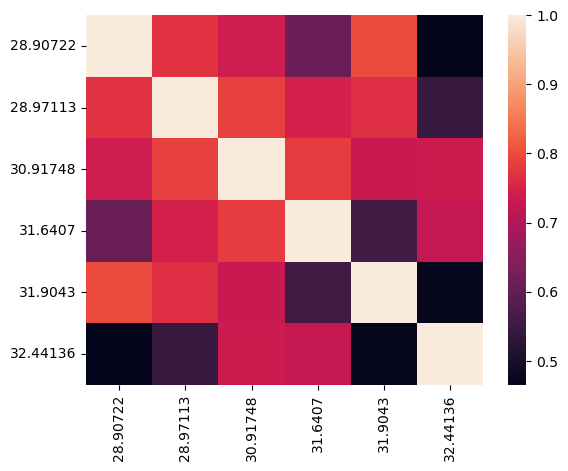

In [13]:
sns.heatmap(corr_list, xticklabels=score_list, yticklabels=score_list)

In [15]:
np.array(corr_list)

array([[1.        , 0.77138914, 0.73780978, 0.61050105, 0.79833183,
        0.46519052],
       [0.77138914, 1.        , 0.78627063, 0.74709871, 0.76559256,
        0.5460306 ],
       [0.73780978, 0.78627063, 1.        , 0.7809661 , 0.72842484,
        0.73345335],
       [0.61050105, 0.74709871, 0.7809661 , 1.        , 0.55827183,
        0.72558056],
       [0.79833183, 0.76559256, 0.72842484, 0.55827183, 1.        ,
        0.47431143],
       [0.46519052, 0.5460306 , 0.73345335, 0.72558056, 0.47431143,
        1.        ]])